<a href="https://colab.research.google.com/github/NilanjanJana16/Data-Science/blob/main/Minor/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader 


In [ ]:
!mkdir images
from bing_image_downloader import downloader
downloader.download("car",limit=30,output_dir='images',adult_filter_off=True)

downloader.download("rose",limit=30,output_dir='images',adult_filter_off=True)

downloader.download("chair",limit=30,output_dir='images',adult_filter_off=True)

downloader.download("aeroplane",limit=30,output_dir='images',adult_filter_off=True)

downloader.download("burger",limit=30,output_dir='images',adult_filter_off=True)



[%] Downloading Images to /content/images/car


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://pictures.topspeed.com/IMG/crop/202008/new-2023-ford-mustan-9_1600x0w.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://s1.cdn.autoevolution.com/images/gallery/MERCEDES-BENZ-C-Klasse--W202--937_22.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.oxygen.com/sites/oxygen/files/2019-05/vince-neil-g.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://quotewizard.com/media/1699/empty_pocket.jpg
[Error]Invalid image, not saving https://quotewizard.com/media/1699/empty_pocket.jpg

[!] Issue getting: https://quotewizard.com/media/1699/empty_pocket.jpg
[!] Error:: Invalid image, not saving https://quotewizard.com/media/1699/empty_pocket.jpg

[%] Downloading Image #4 from http://kerrycustoms.com/images/candigrass.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://assets.fivebelow.com/prod-hts/sp

In [ ]:
#PREProcessing
#1. Resize 
#2. Flattening


import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []
 
DATADIR = '/content/images'
CATEGORIES = ['car','rose','chair','aeroplane','burger']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)                  #Lable Encoding the values 
  path = os.path.join(DATADIR,category)                   #Create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))  #Normalizes the value from 0-1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)



In [ ]:
#Split data into Training and Testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Enter your URLhttps://i.pinimg.com/originals/7e/08/47/7e0847366f8cca0b026e5d35cc830930.jpg
(284, 500, 3)
 PREDICTED OUTPUT: car


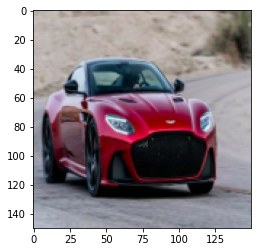

In [ ]:

#SAVE THE MODEL

import pickle
pickle.dump(clf,open('img_model.p','wb'))

model = pickle.load(open('img_model.p','rb'))
# Testing new Image

flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')